In [2]:
import numpy as np
import ROOT

Welcome to JupyROOT 6.28/00


In [26]:
events_sig= []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-130_MA-90/MHc-130_MA-90.root")
tree = f.Get("MHc-130_MA-90_Central")
for idx, evt in enumerate(tree, start=1):
    events_sig.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 500: break

events_diboson = []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-130_MA-90/diboson.root")
tree = f.Get("diboson_Central")
for idx, evt in enumerate(tree, start=1):
    events_diboson.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 500: break

events_ttX = []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-130_MA-90/ttX.root")
tree = f.Get("ttX_Central")
for idx, evt in enumerate(tree, start=1):
    events_ttX.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 500: break

events_others = []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-130_MA-90/others.root")
tree = f.Get("others_Central")
for idx, evt in enumerate(tree, start=1):
    events_others.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 500: break

In [27]:
import matplotlib.pyplot as plt

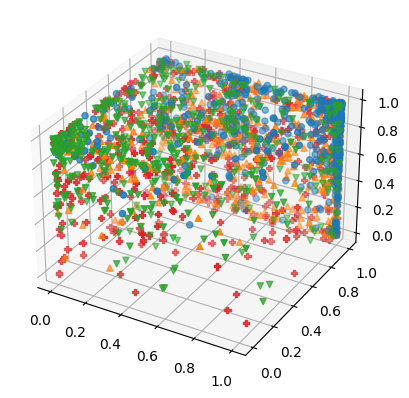

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = []
ys = []
zs = []
for scores in events_sig:
    xs.append(scores[0])
    ys.append(scores[1])
    zs.append(scores[2])
ax.scatter(xs, ys, zs, marker="o")

xs = []
ys = []
zs = []
for scores in events_ttX:
    xs.append(scores[0])
    ys.append(scores[1])
    zs.append(scores[2])
ax.scatter(xs, ys, zs, marker="^")

xs = []
ys = []
zs = []
for scores in events_diboson:
    xs.append(scores[0])
    ys.append(scores[1])
    zs.append(scores[2])
ax.scatter(xs, ys, zs, marker="v")

xs = []
ys = []
zs = []
for scores in events_others:
    xs.append(scores[0])
    ys.append(scores[1])
    zs.append(scores[2])
ax.scatter(xs, ys, zs, marker="P")

In [8]:
ax.scatter(xs, ys, zs, marker="o")
plt.show()

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100)
clf = clf.fit(events_total, labels)

In [43]:
scores_sig = clf.predict_proba(events_sig)
scores_bkg = clf.predict_proba(events_bkg)

h_sig = ROOT.TH1D("h_sig", "", 100, 0., 1.)
h_bkg = ROOT.TH1D("h_bkg", "", 100, 0., 1.)
for score in scores_sig:
    h_sig.Fill(score[0])
for score in scores_bkg:
    h_bkg.Fill(score[0])

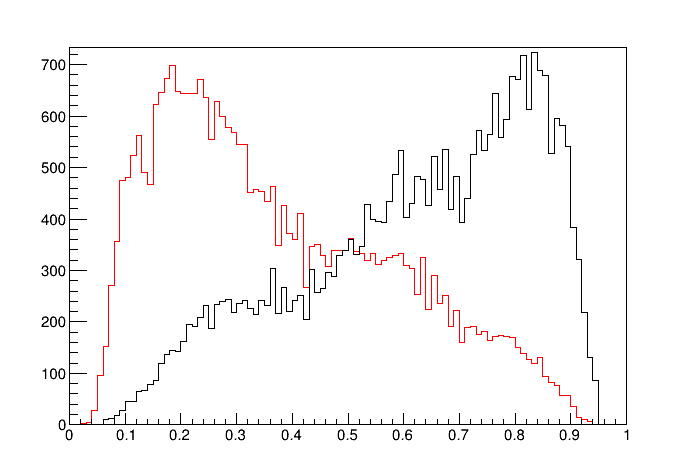

In [44]:
h_sig.SetLineColor(ROOT.kBlack)
h_bkg.SetLineColor(ROOT.kRed)
h_sig.SetStats(0)
h_bkg.SetStats(0)

c = ROOT.TCanvas()
c.cd()
h_bkg.Draw()
h_sig.Draw("same")
c.Draw()

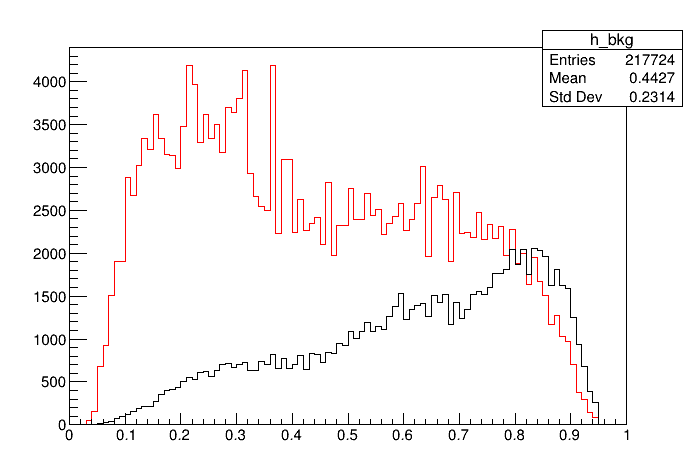

In [45]:
events_sig= []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/MHc-160_MA-85.root")
tree = f.Get("MHc-160_MA-85_Central")
for idx, evt in enumerate(tree, start=1):
    events_sig.append([evt.scoreX, evt.scoreY, evt.scoreZ])

events_bkg = []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/ttX.root")
tree = f.Get("ttX_Central")
for idx, evt in enumerate(tree, start=1):
    events_bkg.append([evt.scoreX, evt.scoreY, evt.scoreZ])

scores_sig = clf.predict_proba(events_sig)
scores_bkg = clf.predict_proba(events_bkg)

h_sig = ROOT.TH1D("h_sig", "", 100, 0., 1.)
h_bkg = ROOT.TH1D("h_bkg", "", 100, 0., 1.)
for score in scores_sig:
    h_sig.Fill(score[0])
for score in scores_bkg:
    h_bkg.Fill(score[0])
    
h_sig.SetLineColor(ROOT.kBlack)
h_bkg.SetLineColor(ROOT.kRed)

c = ROOT.TCanvas()
c.cd()
h_bkg.Draw()
h_sig.Draw("same")
c.Draw()

In [36]:
events_sig= []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/MHc-160_MA-85.root")
tree = f.Get("MHc-160_MA-85_Central")
for idx, evt in enumerate(tree, start=1):
    events_sig.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 30000: break

events_bkg = []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/diboson.root")
tree = f.Get("diboson_Central")
for idx, evt in enumerate(tree, start=1):
    events_bkg.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 10000: break

f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/ttX.root")
tree = f.Get("ttX_Central")
for idx, evt in enumerate(tree, start=1):
    events_bkg.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 10000: break

f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/others.root")
tree = f.Get("others_Central")
for idx, evt in enumerate(tree, start=1):
    events_bkg.append([evt.scoreX, evt.scoreY, evt.scoreZ])
    if idx == 10000: break
    
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(10, 5), random_state=42)
clf.fit(events_total, labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5), random_state=42)

In [37]:
scores_sig = clf.predict_proba(events_sig)
scores_bkg = clf.predict_proba(events_bkg)

h_sig = ROOT.TH1D("h_sig", "", 100, 0., 1.)
h_bkg = ROOT.TH1D("h_bkg", "", 100, 0., 1.)
for score in scores_sig:
    h_sig.Fill(score[0])
for score in scores_bkg:
    h_bkg.Fill(score[0])

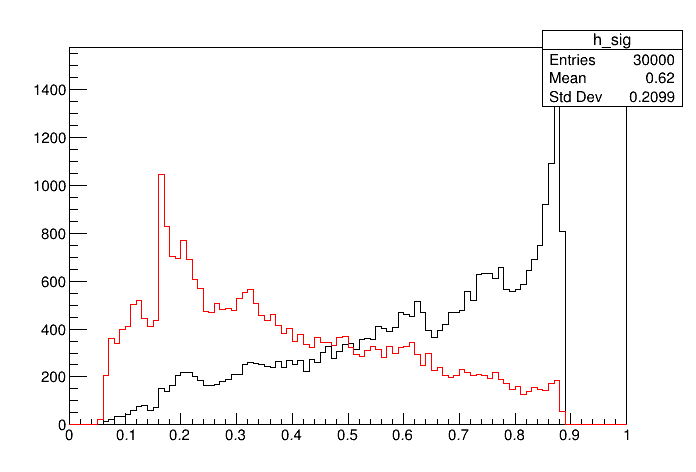

In [38]:
h_sig.SetLineColor(ROOT.kBlack)
h_bkg.SetLineColor(ROOT.kRed)

c = ROOT.TCanvas()
c.cd()
h_sig.Draw()
h_bkg.Draw("same")
c.Draw()

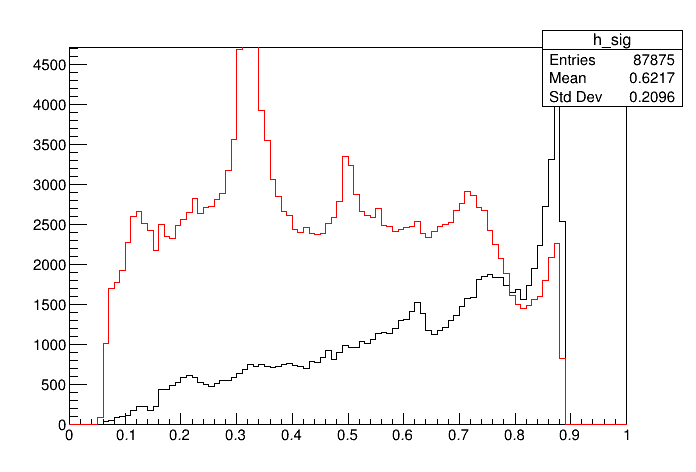

In [39]:
events_sig= []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/MHc-160_MA-85.root")
tree = f.Get("MHc-160_MA-85_Central")
for idx, evt in enumerate(tree, start=1):
    events_sig.append([evt.scoreX, evt.scoreY, evt.scoreZ])

events_bkg = []
f = ROOT.TFile("samples/2018/Skim3Mu__GraphNet__/MHc-160_MA-85/ttX.root")
tree = f.Get("ttX_Central")
for idx, evt in enumerate(tree, start=1):
    events_bkg.append([evt.scoreX, evt.scoreY, evt.scoreZ])

scores_sig = clf.predict_proba(events_sig)
scores_bkg = clf.predict_proba(events_bkg)

h_sig = ROOT.TH1D("h_sig", "", 100, 0., 1.)
h_bkg = ROOT.TH1D("h_bkg", "", 100, 0., 1.)
for score in scores_sig:
    h_sig.Fill(score[0])
for score in scores_bkg:
    h_bkg.Fill(score[0])
    
h_sig.SetLineColor(ROOT.kBlack)
h_bkg.SetLineColor(ROOT.kRed)

c = ROOT.TCanvas()
c.cd()
h_sig.Draw()
h_bkg.Draw("same")
c.Draw()